# Demo: Image Generation with Discovered Concept Vectors

In [1]:
import torch
from diffusers import StableDiffusionPipeline
from model import MLP
from utils.utils_model import load_weights
import json

/home/vardhan/work/InterpretDiffusion/interpret_diff/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load stable diffusion

In [2]:
device='cuda:0'
pipe = StableDiffusionPipeline.from_pretrained(
    'CompVis/stable-diffusion-v1-4',
).to(device)

/home/vardhan/work/InterpretDiffusion/interpret_diff/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


### Load the concept vector model
Note that the model is implemented as a pytorch MLP layer. However, it just works as a lookup table of concept vectors

In [3]:
mlp=MLP(resolution=512//64).to(device)
pipe.unet.set_controlnet(mlp)
pipe.unet=load_weights(pipe.unet, 'new_checkpoints/unet.pth')
concept_dict = json.load(open("new_checkpoints/concept_dict.json","r"))

### Inference without concept vector

100%|██████████| 50/50 [00:15<00:00,  3.13it/s]


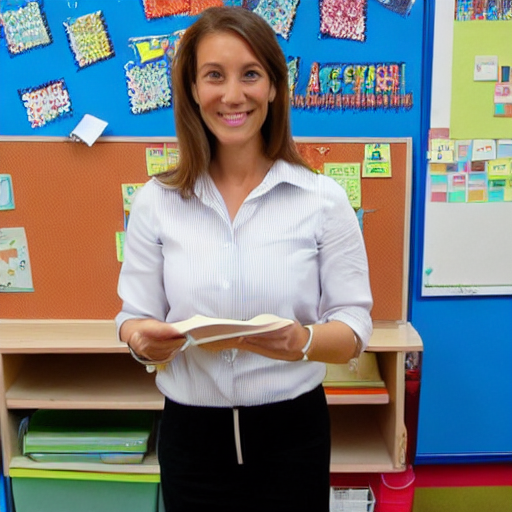

In [4]:
gen = torch.Generator(device=device)

prompt = 'a picture of a teacher'
seed= 3967113
scale=7.5

gen.manual_seed(seed)

out = pipe(prompt=prompt, generator=gen, guidance_scale=scale)
out.images[0]

### Inference with concept vector

In [5]:
# specify which concept vector to use.
condition=torch.zeros(1,len(concept_dict), device=device)
condition[:,concept_dict['asianrace']]=1


gen = torch.Generator(device=device)

prompt = 'a picture of a teacher'
seed= 3967113
scale=10

gen.manual_seed(seed)

out = pipe(prompt=prompt, generator=gen, guidance_scale=scale, controlnet_cond=condition)
display(out.images[0])

  0%|          | 0/50 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x8 and 100x81920)